# Boosten dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population


In [101]:
# dict1={'CRIM':  'per capita crime rate by town',

# 'ZN':'proportion of residential land zoned for lots over 25,000 sq.ft',

# 'INDUS': 'proportion of non-retail business acres per town.',

# 'CHAS':'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',

# 'NOX': 'nitric oxides concentration (parts per 10 million)',

# 'RM': 'average number of rooms per dwelling',

# 'AGE':'proportion of owner-occupied units built prior to 1940',

# 'DIS':'weighted distances to five Boston employment centres',

# 'RAD': 'index of accessibility to radial highways',
    
# 'TAX': 'full-value property-tax rate per $10,000',

# 'PTRATIO': 'pupil-teacher ratio by town',

# 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',

# 'LSTAT': '% lower status of the population'}
# print(dict1.values())


# Importing necessary libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #model 

import pickle #Save the model in HDD
from sklearn import datasets 



In [92]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Loading Dataset

In [93]:
data= pd.DataFrame(boston.data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
targets = boston.target
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Cleaning Dataset

In [95]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Observations:

1) Dataset not contains any null values.

2) All columns having datatype float.

# Correlation

<AxesSubplot:>

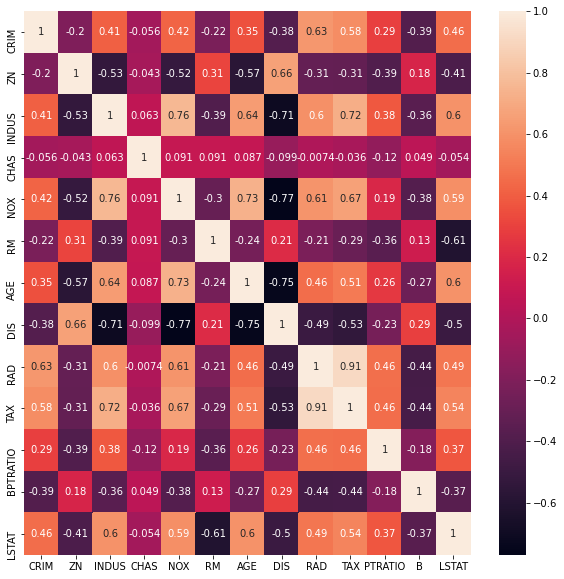

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Observation

1)Strong positive correlation seen beetween RAD and TAX.

2)Strong negative Correlation seen in INDUS,NOX,AGE with DIS.

# Plotting Skewness

C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

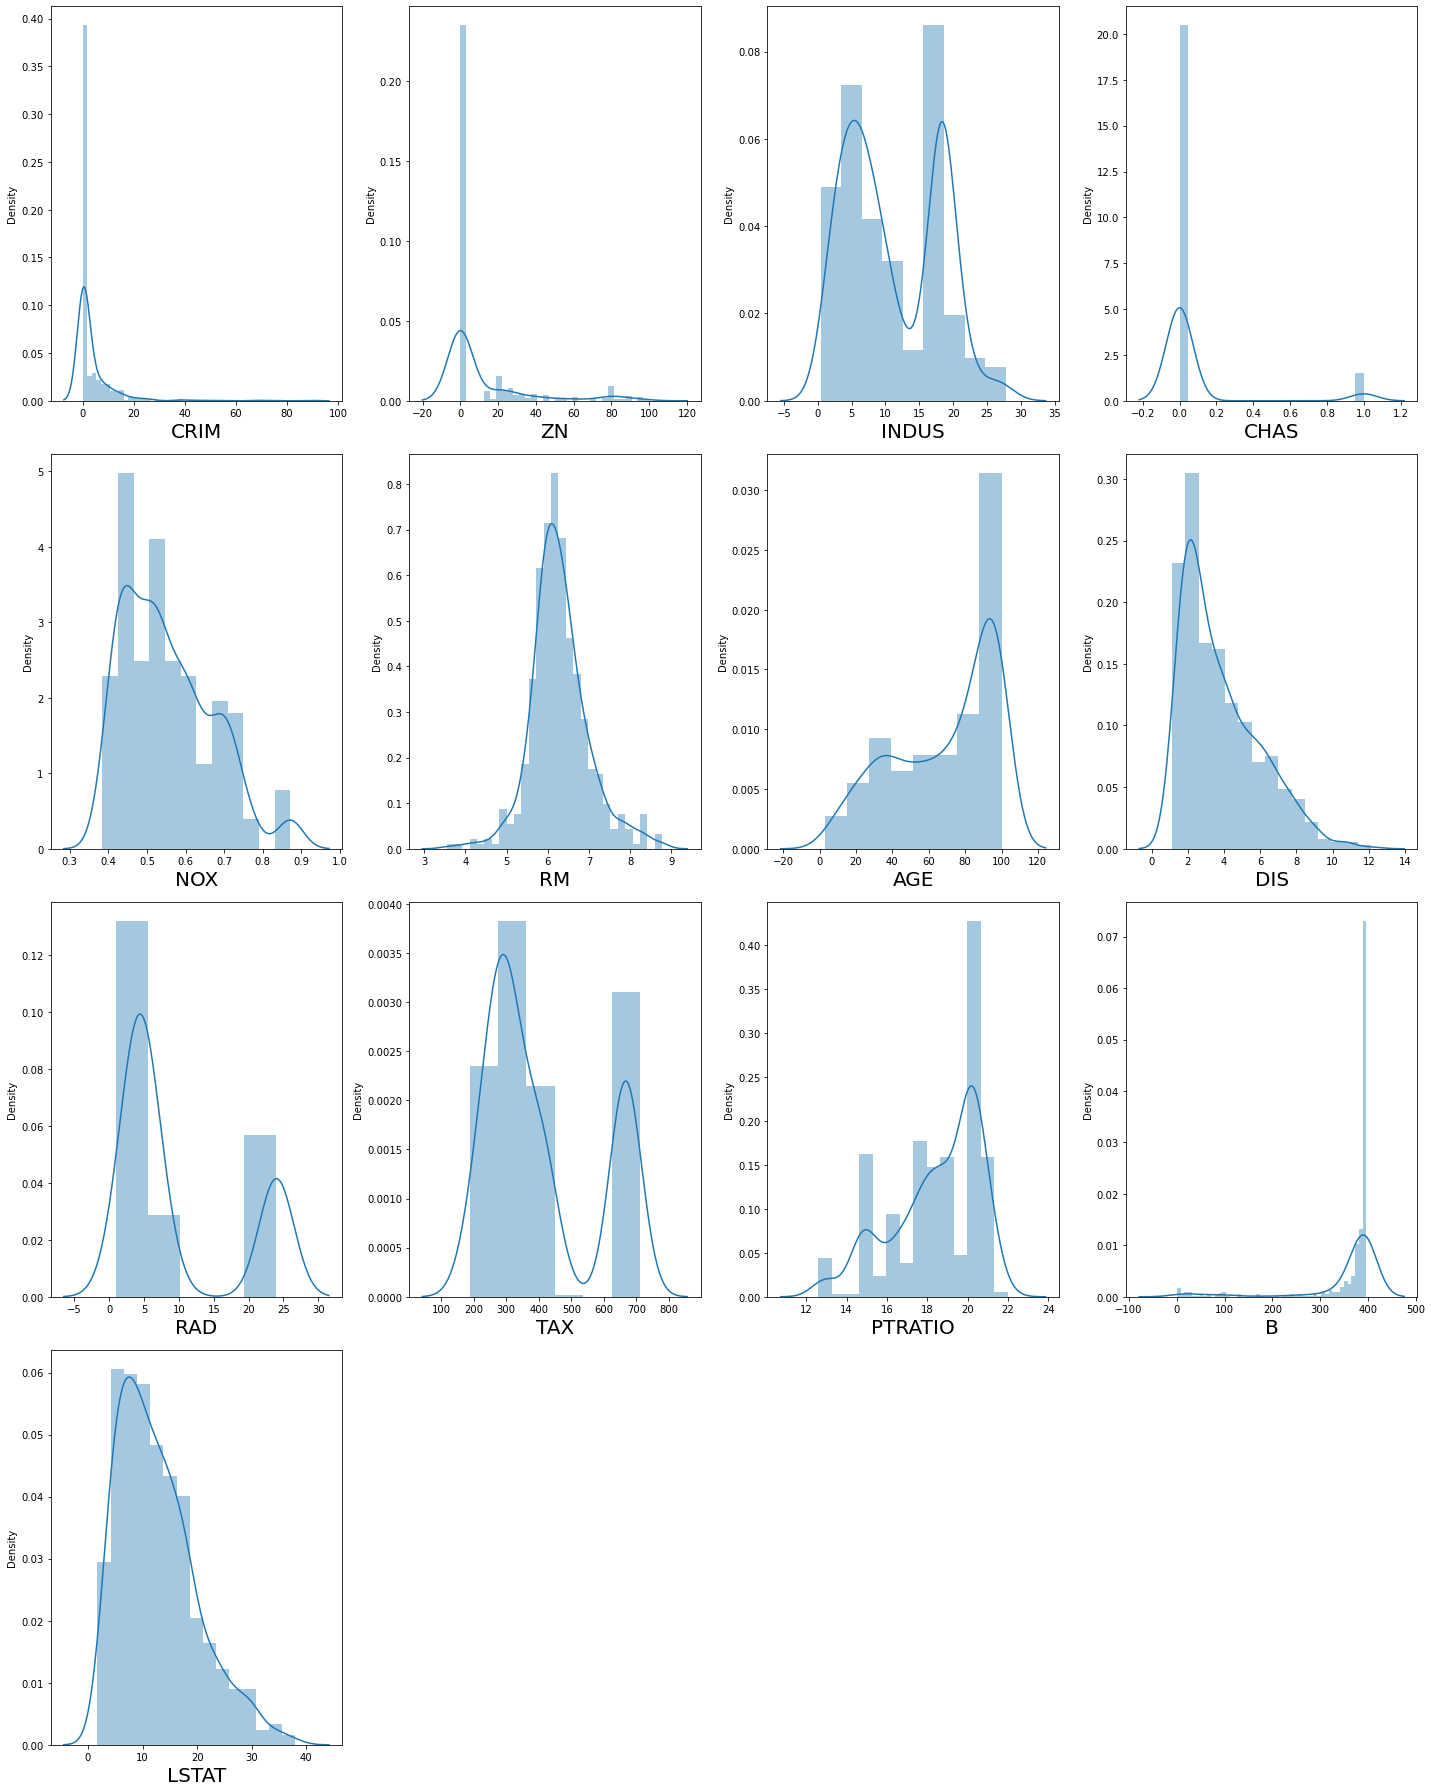

In [100]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

## Observations

1)CRIM, ZN, CHAS having Right(positive) skewness.

2)B having Left(negative) skewness.

3)Other having no more Skewness whereas RM having zero skewness.

# Select dependant and independant variables

x= Independant variable

y= Dependant variable

In [9]:
y= targets
x=data[data.columns[0:]]

# Ploting Dependant variable vs Independant variables

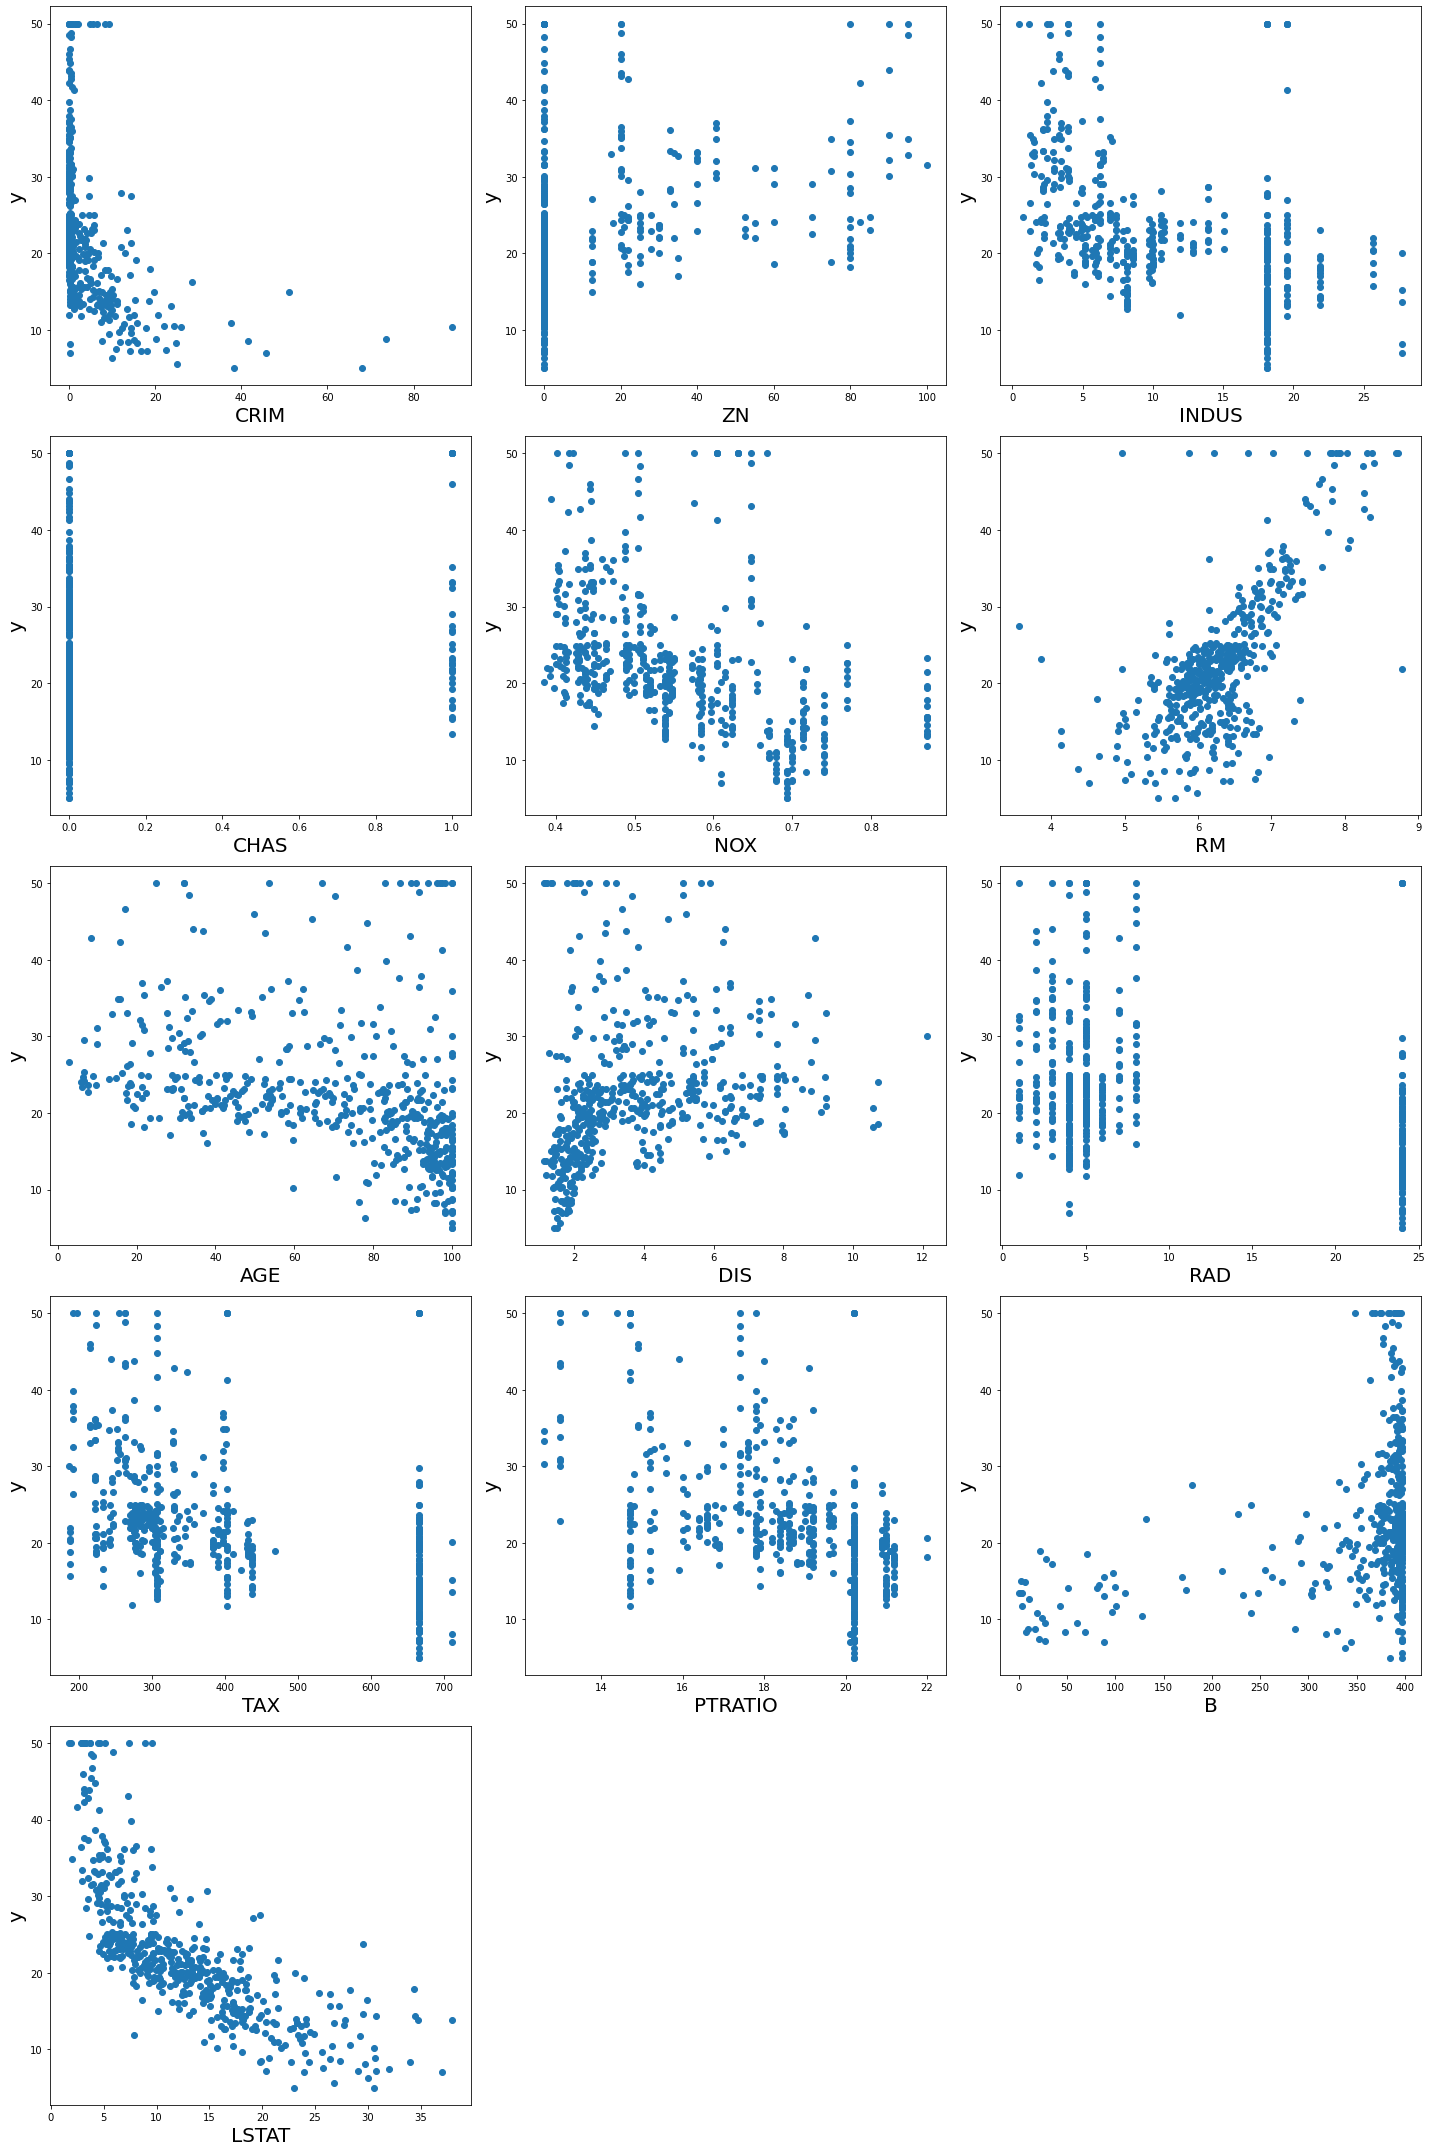

In [10]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Observations

1) LSTAT and RM are more correlated with dependant variable.

2) Other columns are not a more correlated with the dependant variable

# Standardization of training data

Used the standardization process to convert values in all columns in same scale.

In [11]:
scaler =StandardScaler()

x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# Spliting Training-Testing Dataset

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

# Linear Regression model

In [110]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

# Training & Testing accuracy

In [116]:
acc_training=regression.score(x_train,y_train)

print("Traning accuracy: ",acc_training)

acc_testing=regression.score(x_test,y_test)

print("Testing accuracy:" ,acc_testing)

Traning accuracy:  0.730647531347494
Testing accuracy: 0.7519030329262334


# Prediction

In [118]:
predy_train=regression.predict(x_train)
r_squared_train=r2_score(y_train,predy_train)
print('r_squared value for training data:', r_squared_train)

predy_test=regression.predict(x_test)
r_squared_test=r2_score(y_test,predy_test)
print('r_squared value for testing data:', r_squared_test)

r_squared value for training data: 0.730647531347494
r_squared value for testing data: 0.7519030329262334


# Model Evaluation

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt



In [149]:
print("RMSE and adjusted_r_squared values for training dataset ")
rmse_train=sqrt(mean_squared_error(y_train,predy_train))

print("RMSE vlaue: ",rmse_train)

adjusted_r_squared_train = 1 - (1-r_squared_train)*(len(y)-1)/(len(y)-x.shape[1]-1)

print("adjusted_r_squared value: ", adjusted_r_squared_train)
print('________________________________________________________________________________________________')
print("\nRMSE and adjusted_r_squared values for testing dataset")
rmse_test=sqrt(mean_squared_error(y_test,predy_test))
print("RMSE vlaue: ",rmse_test)

adjusted_r_squared_test = 1 - (1-r_squared_test)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("adjusted_r_squared value: ", adjusted_r_squared_test)

RMSE and adjusted_r_squared values for training dataset 
RMSE vlaue:  4.720391098867944
adjusted_r_squared value:  0.7235304945741555
________________________________________________________________________________________________

RMSE and adjusted_r_squared values for testing dataset
RMSE vlaue:  4.70939772621828
adjusted_r_squared value:  0.74534762525965


In [24]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))  #final model for deployment

# Regularization 

In [122]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2



0.730647531347494

In [153]:
print('r2 value for training data:', regression.score(x_train,y_train)) # R2 for training dataset 

print('r2 value for testing data:',regression.score(x_test,y_test)) # R2 for testing dataset 
print('_____________________________________________________________________________')
print('adj_r2 value for training data', adj_r2(x_train,y_train,regression))

print('adj_r2 value for testing data',adj_r2(x_test,y_test,regression))

print('_____________________________________________________________________________')
print('MSE value for training data data',mean_squared_error(y_train,regression.predict(x_train)))
print('MSE value for testing data' ,mean_squared_error(y_test,regression.predict(x_test)))

r2 value for training data: 0.730647531347494
r2 value for testing data: 0.7519030329262334
_____________________________________________________________________________
adj_r2 value for training data 0.7210541557516514
adj_r2 value for testing data 0.7233609039708444
_____________________________________________________________________________
MSE value for training data data 22.282092126271717
MSE value for testing data 22.17842694370991


# Lasso Regression 


In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_score_)
print(lasso_regressor.best_params_)

C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4488.820689382209, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4111.608200506886, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4122.909432662281, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

-34.44114847278198
{'alpha': 0.33}


In [154]:
lasso_alpha=0.33
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(x_train, y_train)

print("best value of alpha for Lasso regration :", lasso_alpha)

r2=regression.score(x_train,y_train)
print('R2 score of training data for lasso regression:',r2)
r3=regression.score(x_test,y_test)
print('R2 score of testing data for lasso regression:',r3)
print('_____________________________________________________________________________________')
print('\nadj_r2 score of training data for lasso regression', adj_r2(x_train,y_train,lasso_reg))


print('adj_r2 score of testing data for lasso regression:' ,adj_r2(x_test,y_test,lasso_reg))

best value of alpha for Lasso regration : 0.33
R2 score of training data for lasso regression: 0.730647531347494
R2 score of testing data for lasso regression: 0.7519030329262334
_____________________________________________________________________________________

adj_r2 score of training data for lasso regression 0.6885295752920544
adj_r2 score of testing data for lasso regression: 0.6802401846600536


# Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 205}
-29.842633670826764


In [155]:
Ridge_alpha=205
print("best value of alpha for Ridge regration :", Ridge_alpha)
ridge_reg = Ridge(Ridge_alpha)
ridge_reg.fit(x_train, y_train)

rtr=ridge_reg.score(x_train,y_train)
print('R2 score of training data for Ridge regression:',rtr)

rts=ridge_reg.score(x_test,y_test)
print('R2 score of testing data for Ridge regression:',rts)
print('________________________________________________________________________________________________')
print('\nadj_r2 score of training data for ridge regression',adj_r2(x_train,y_train,ridge_reg))

print('adj_r2 score of testing data for ridge regression',adj_r2(x_test,y_test,ridge_reg))



best value of alpha for Ridge regration : 205
R2 score of training data for Ridge regression: 0.676831894736837
R2 score of testing data for Ridge regression: 0.6687725200628489
________________________________________________________________________________________________

adj_r2 score of training data for ridge regression 0.6653217978370531
adj_r2 score of testing data for ridge regression 0.6306667037868935


# Elastic net


In [43]:
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [44]:
elastic_alpha=elasticCV.alpha_
elastic_alpha

0.024805870965009

In [156]:
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(x_train, y_train)

print("best value of alpha for Ridge regration :",elastic_alpha)
print('\nR2 score of training data for elasticnet regression:',elasticnet_reg.score(x_train, y_train))

print('R2 score of testing data for elasticnet regression:',elasticnet_reg.score(x_test,y_test))
print('________________________________________________________________________________________________')
print('\nadj_r2 score of training data for elasticnet regression',adj_r2(x_train,y_train,elasticnet_reg))

print('adj_r2 score of testing data for elasticnet regression',adj_r2(x_test, y_test,elasticnet_reg))

best value of alpha for Ridge regration : 0.024805870965009

R2 score of training data for elasticnet regression: 0.7299710330907252
R2 score of testing data for elasticnet regression: 0.7487551475558303
________________________________________________________________________________________________

adj_r2 score of training data for elasticnet regression 0.7203535630364223
adj_r2 score of testing data for elasticnet regression 0.7198508724958815
